In [275]:
import pandas as pd
import numpy as np
# import matplot lib
%matplotlib inline
import matplotlib.pyplot as plt
import streamlit as st

In [276]:
st.text('Fixed width text')
st.markdown('_Markdown_') # see #*
st.caption('Balloons. Hundreds of them...')
st.latex(r''' e^{i\pi} + 1 = 0 ''')
st.write('Most objects') # df, err, func, keras!
st.write(['st', 'is <', 3]) # see *
st.title('My title')
st.header('My header')
st.subheader('My sub')
st.code('for i in range(8): foo()')

# * optional kwarg unsafe_allow_html = True


DeltaGenerator()

## Import data

In [277]:
# Import Data
health_data = pd.read_csv("C:/Users/McLovin/OneDrive/Desktop/Capstone/New Data/oura_2019-01-01_2023-09-09_trends_Original.csv")

## View data

In [278]:
health_data

,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,Total Sleep Duration,Total Bedtime,Awake Time,REM Sleep Duration,Light Sleep Duration,Deep Sleep Duration,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Bedtime Start,Bedtime End,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation (°C),Temperature Trend Deviation,Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Activity Burn,Total Burn,Steps,Equivalent Walking Distance,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,2021-01-13,83.0,79.0,100.0,60.0,96.0,75.0,83.0,100.0,25500.0,27960.0,2460.0,9990.0,12540.0,2970.0,235.0,91.0,540.0,13890.0,2021-01-12T20:58:31.000-07:00,2021-01-13T04:44:31.000-07:00,76.91,68.0,16.0,0.03,NaN,15.625,94,69.0,95.0,95.0,100.0,100.0,716,2768,9892,13824,36360,28200,15000,6780,60,0,1.65625,1,81.0,76.0,NaN,NaN,NaN,100.0,74.0,NaN,99.0
1,2021-01-14,76.0,67.0,95.0,46.0,93.0,79.0,72.0,100.0,22740.0,25560.0,2820.0,6420.0,13980.0,2340.0,237.0,89.0,270.0,12900.0,2021-01-13T21:35:07.000-07:00,2021-01-14T04:41:07.000-07:00,64.48,59.0,20.0,-0.28,0.02,16.000,91,47.0,100.0,95.0,100.0,99.0,488,2670,10903,9223,46680,13200,23160,3360,0,0,1.62500,0,81.0,71.0,NaN,90.0,NaN,92.0,93.0,NaN,69.0
2,2021-01-15,78.0,72.0,98.0,95.0,100.0,79.0,67.0,49.0,23760.0,24840.0,1080.0,7980.0,11010.0,4770.0,251.0,96.0,150.0,12210.0,2021-01-15T01:17:22.000-07:00,2021-01-15T08:11:22.000-07:00,83.52,77.0,13.0,0.24,0.33,17.125,95,77.0,95.0,95.0,100.0,100.0,1474,3568,14215,27529,30720,21840,15420,8400,5520,4500,2.12500,1,80.0,75.0,85.0,86.0,88.0,76.0,57.0,NaN,96.0
3,2021-01-16,69.0,69.0,97.0,60.0,98.0,70.0,67.0,27.0,23190.0,25080.0,1890.0,7530.0,12690.0,2970.0,241.0,92.0,150.0,12180.0,2021-01-16T02:02:00.000-07:00,2021-01-16T09:00:00.000-07:00,78.64,71.0,15.0,0.05,0.34,16.500,97,77.0,100.0,100.0,100.0,100.0,372,2403,8606,7090,31500,35040,17700,2100,60,0,1.40625,0,64.0,60.0,84.0,11.0,58.0,98.0,81.0,NaN,51.0
4,2021-01-17,78.0,73.0,98.0,43.0,95.0,86.0,70.0,87.0,24060.0,26820.0,2760.0,8160.0,13740.0,2160.0,174.0,90.0,210.0,12840.0,2021-01-16T23:50:45.000-07:00,2021-01-17T07:17:45.000-07:00,67.83,59.0,28.0,-0.12,0.18,16.500,93,70.0,78.0,100.0,100.0,100.0,438,2435,5786,8355,35460,36540,9960,4380,60,0,1.43750,2,78.0,74.0,85.0,97.0,72.0,100.0,83.0,NaN,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,2023-07-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,100.0,95.0,43.0,71.0,67.0,129,2083,2836,2590,16980,20820,6120,420,0,42060,1.21875,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,2023-07-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89,100.0,100.0,60.0,96.0,96.0,420,2499,8834,8084,13140,20700,22560,1440,60,28500,1.46875,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,2023-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,100.0,100.0,60.0,71.0,68.0,1,1889,30,29,840,22980,120,0,0,62460,1.12500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,2023-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,68.0,95.0,60.0,71.0,91.0,235,2295,5656,4575,36120,22140,11100,1380,0,15660,1.34375,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Describe Data

In [279]:
# Attribute
health_data.dtypes

date                            object
Sleep Score                    float64
Total Sleep Score              float64
REM Sleep Score                float64
Deep Sleep Score               float64
Sleep Efficiency Score         float64
Restfulness Score              float64
Sleep Latency Score            float64
Sleep Timin Score              float64
Total Sleep Duration           float64
Total Bedtime                  float64
Awake Time                     float64
REM Sleep Duration             float64
Light Sleep Duration           float64
Deep Sleep Duration            float64
Restless Sleep                 float64
Sleep Efficiency               float64
Sleep Latency                  float64
Sleep Timing                   float64
Bedtime Start                   object
Bedtime End                     object
Average Resting Heart Rate     float64
Lowest Resting Heart Rate      float64
Average HRV                    float64
Temperature Deviation (°C)     float64
Temperature Trend Deviati

## Set up dataframe

In [280]:
df = pd.DataFrame(health_data)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         970 non-null    object 
 1   Sleep Score                  898 non-null    float64
 2   Total Sleep Score            898 non-null    float64
 3   REM Sleep Score              898 non-null    float64
 4   Deep Sleep Score             898 non-null    float64
 5   Sleep Efficiency Score       898 non-null    float64
 6   Restfulness Score            898 non-null    float64
 7   Sleep Latency Score          898 non-null    float64
 8   Sleep Timin Score            898 non-null    float64
 9   Total Sleep Duration         896 non-null    float64
 10  Total Bedtime                896 non-null    float64
 11  Awake Time                   896 non-null    float64
 12  REM Sleep Duration           896 non-null    float64
 13  Light Sleep Duration

## Convert Sleep Duration and Rest Time to hours

In [282]:
df["Total Sleep Duration"] = df["Total Sleep Duration"] / 3600
df["Rest Time"] = df["Rest Time"] / 3600

df["Total Sleep Duration"], df["Rest Time"]

(0      7.083333
 1      6.316667
 2      6.600000
 3      6.441667
 4      6.683333
          ...   
 965         NaN
 966         NaN
 967         NaN
 968         NaN
 969         NaN
 Name: Total Sleep Duration, Length: 970, dtype: float64,
 0       7.833333
 1       3.666667
 2       6.066667
 3       9.733333
 4      10.150000
          ...    
 965     5.783333
 966     5.750000
 967     6.383333
 968     6.150000
 969     1.216667
 Name: Rest Time, Length: 970, dtype: float64)

In [283]:
pd.crosstab(df["Total Sleep Duration"] > 7, df["Readiness Score"] >85)

Readiness Score,False,True
Total Sleep Duration,,
False,493,47
True,279,151


<Axes: >

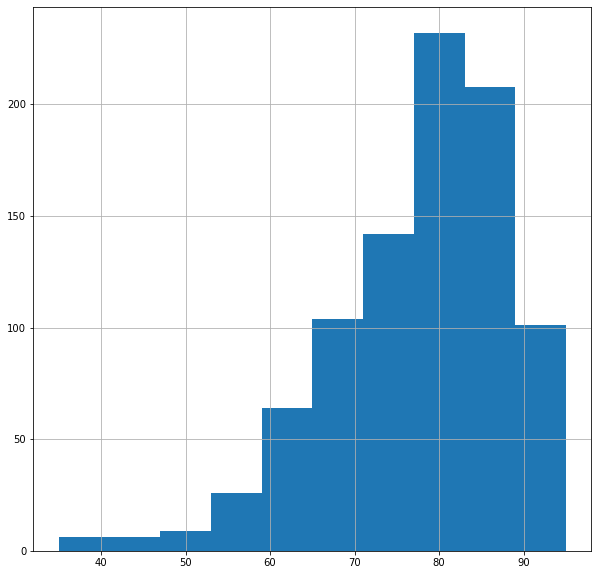

In [284]:
df["Readiness Score"].hist(figsize=(10, 10))

## Manipulating Data

In [285]:
df.dropna(inplace=True)

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 7 to 895
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         820 non-null    object 
 1   Sleep Score                  820 non-null    float64
 2   Total Sleep Score            820 non-null    float64
 3   REM Sleep Score              820 non-null    float64
 4   Deep Sleep Score             820 non-null    float64
 5   Sleep Efficiency Score       820 non-null    float64
 6   Restfulness Score            820 non-null    float64
 7   Sleep Latency Score          820 non-null    float64
 8   Sleep Timin Score            820 non-null    float64
 9   Total Sleep Duration         820 non-null    float64
 10  Total Bedtime                820 non-null    float64
 11  Awake Time                   820 non-null    float64
 12  REM Sleep Duration           820 non-null    float64
 13  Light Sleep Duration     

In [287]:
# Randomize data 1 = 100%
df.sample(frac=1)

,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,Total Sleep Duration,Total Bedtime,Awake Time,REM Sleep Duration,Light Sleep Duration,Deep Sleep Duration,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Bedtime Start,Bedtime End,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation (°C),Temperature Trend Deviation,Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Activity Burn,Total Burn,Steps,Equivalent Walking Distance,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
811,2023-06-08,90.0,93.0,100.0,85.0,100.0,82.0,70.0,100.0,7.583333,28860.0,1560.0,11460.0,12570.0,3270.0,155.0,95.0,270.0,14490.0,2023-06-07T21:56:46.000-06:00,2023-06-08T05:57:46.000-06:00,72.66,61.0,11.0,0.06,0.10,16.250,74,59.0,100.0,43.0,71.0,80.0,391,2530,8846,7200,41160,6.316667,20460,2040,0,0,1.50000,0,78.0,87.0,96.0,97.0,89.0,99.0,87.0,57.0,28.0
239,2021-09-21,77.0,73.0,88.0,27.0,90.0,91.0,70.0,100.0,6.316667,25800.0,3060.0,5280.0,16380.0,1080.0,193.0,88.0,240.0,12630.0,2021-09-20T21:55:38.000-06:00,2021-09-21T05:05:38.000-06:00,64.59,58.0,20.0,-0.10,-0.01,16.375,92,59.0,100.0,95.0,100.0,98.0,406,2432,9095,7928,41040,8.083333,12540,3480,240,0,1.43750,0,83.0,69.0,83.0,100.0,58.0,100.0,89.0,89.0,89.0
667,2022-12-25,94.0,97.0,100.0,97.0,95.0,89.0,89.0,90.0,8.141667,32700.0,3390.0,10020.0,14040.0,5250.0,172.0,90.0,690.0,17190.0,2022-12-24T22:32:04.000-07:00,2022-12-25T07:37:04.000-07:00,67.50,58.0,19.0,0.15,0.02,16.500,85,70.0,100.0,60.0,100.0,96.0,585,2781,12626,11512,35520,6.033333,26340,2820,0,0,1.65625,0,92.0,100.0,100.0,100.0,94.0,92.0,98.0,87.0,49.0
150,2021-06-16,78.0,79.0,98.0,31.0,83.0,74.0,83.0,100.0,7.091667,30060.0,4530.0,7680.0,16230.0,1620.0,241.0,85.0,1230.0,14460.0,2021-06-15T20:41:32.000-06:00,2021-06-16T05:02:32.000-06:00,71.31,64.0,17.0,0.13,0.28,16.875,93,60.0,100.0,100.0,100.0,100.0,496,2569,11840,10058,40980,6.516667,17520,4440,0,0,1.53125,0,80.0,68.0,78.0,79.0,78.0,94.0,78.0,86.0,100.0
284,2021-11-06,62.0,67.0,97.0,72.0,58.0,57.0,70.0,1.0,6.083333,30480.0,8580.0,7260.0,11760.0,2880.0,253.0,72.0,240.0,13260.0,2021-11-06T06:13:23.000-06:00,2021-11-06T14:41:23.000-06:00,87.44,79.0,11.0,1.63,0.68,18.250,92,80.0,100.0,95.0,96.0,99.0,167,2100,3640,3155,31800,12.166667,9300,480,0,1020,1.21875,0,35.0,33.0,100.0,35.0,79.0,1.0,1.0,71.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2021-05-17,69.0,61.0,80.0,15.0,83.0,77.0,81.0,100.0,5.858333,24900.0,3810.0,5340.0,15000.0,750.0,194.0,85.0,450.0,13410.0,2021-05-16T22:03:38.000-06:00,2021-05-17T04:58:38.000-06:00,70.43,60.0,18.0,0.07,0.14,17.500,87,73.0,100.0,100.0,100.0,100.0,667,2704,11305,13483,34440,7.916667,17160,6300,0,0,1.59375,0,77.0,45.0,85.0,94.0,73.0,99.0,95.0,83.0,51.0
260,2021-10-12,87.0,79.0,96.0,84.0,98.0,86.0,86.0,100.0,6.691667,25800.0,1710.0,6660.0,14100.0,3330.0,261.0,93.0,600.0,12750.0,2021-10-11T21:52:25.000-06:00,2021-10-12T05:02:25.000-06:00,64.20,59.0,25.0,-0.02,0.17,16.500,95,72.0,100.0,100.0,100.0,100.0,507,2566,10324,9880,34920,8.583333,16560,3780,240,0,1.50000,0,85.0,94.0,77.0,73.0,72.0,100.0,94.0,91.0,93.0
77,2021-04-02,79.0,80.0,98.0,84.0,100.0,80.0,67.0,41.0,7.183333,27240.0,1380.0,7710.0,14040.0,4110.0,203.0,95.0,150.0,13410.0,2021-04-02T01:12:02.000-06:00,2021-04-02T08:46:02.000-06:00,74.74,67.0,13.0,0.18,0.18,16.875,87,81.0,100.0,60.0,100.0,98.0,761,2941,18278,15403,31680,5.233333,3

In [288]:
# Reset index if necessary
# df.reset_index(drop=True, inplace=True)

## Matplotlib flow

[Text(0.5, 1.0, 'Simple Plot'),
 Text(0.5, 0, 'Total Sleep Duration'),
 Text(0, 0.5, 'Readiness Score')]

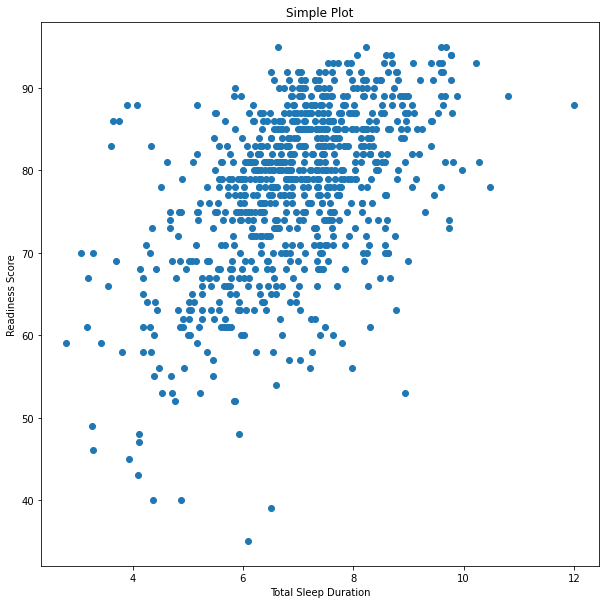

In [289]:
# 1. Prepare data
x = df["Total Sleep Duration"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Total Sleep Duration",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
# fig.savefig("C:/Users/McLovin/OneDrive/Desktop/Capstone/New Data/Images/Figure_1.png")

[Text(0.5, 1.0, 'Simple Plot'),
 Text(0.5, 0, 'Previous Night Score'),
 Text(0, 0.5, 'Readiness Score')]

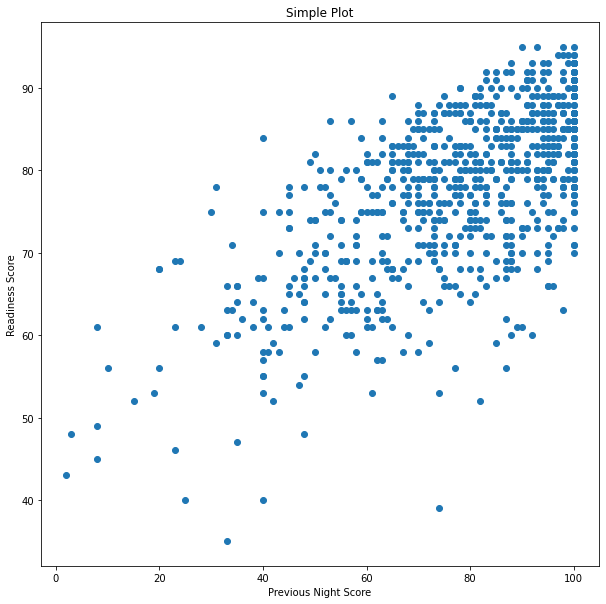

In [290]:
# 1. Prepare data
x = df["Previous Night Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Previous Night Score",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
# fig.savefig("C:/Users/McLovin/OneDrive/Desktop/Capstone/New Data/Images/Figure_2.png")

[Text(0.5, 1.0, 'Simple Plot'),
 Text(0.5, 0, 'Move Every Hour Score'),
 Text(0, 0.5, 'Readiness Score')]

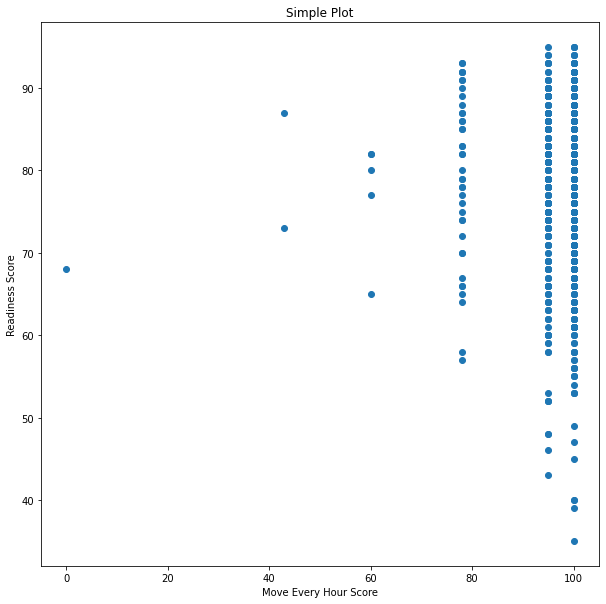

In [291]:
# 1. Prepare data
x = df["Move Every Hour Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Move Every Hour Score",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
# fig.savefig("C:/Users/McLovin/OneDrive/Desktop/Capstone/New Data/Images/Figure_1.png")

[Text(0.5, 1.0, 'Simple Plot'),
 Text(0.5, 0, 'Non-wear Time'),
 Text(0, 0.5, 'Readiness Score')]

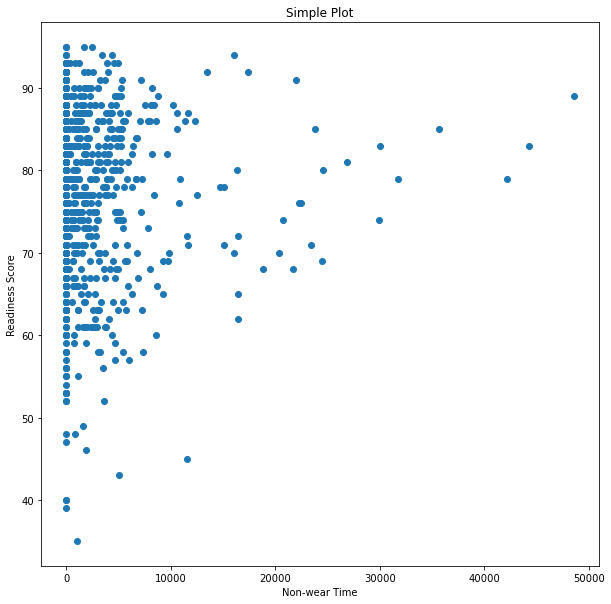

In [292]:
# 1. Prepare data
x = df["Non-wear Time"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Non-wear Time",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
# fig.savefig("C:/Users/McLovin/OneDrive/Desktop/Capstone/New Data/Images/Figure_1.png")

[Text(0.5, 1.0, 'Simple Plot'),
 Text(0.5, 0, 'Rest Time'),
 Text(0, 0.5, 'Readiness Score')]

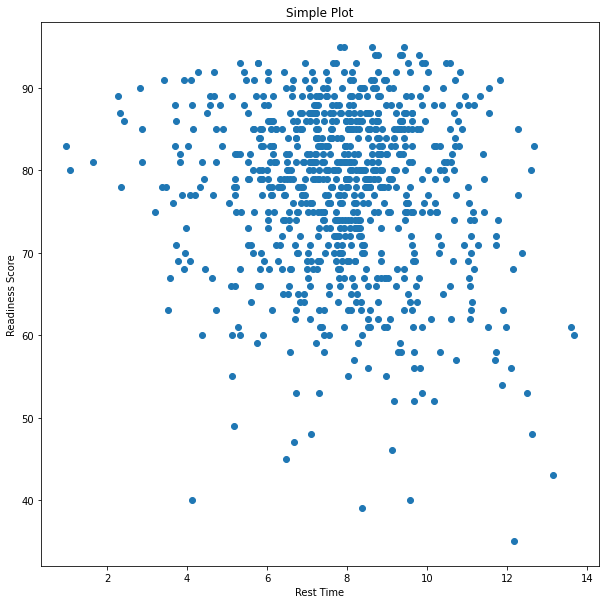

In [293]:
# 1. Prepare data
x = df["Rest Time"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Rest Time",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
# fig.savefig("C:/Users/McLovin/OneDrive/Desktop/Capstone/New Data/Images/Figure_1.png")

[Text(0.5, 1.0, 'Simple Plot'),
 Text(0.5, 0, 'Previous Day Activity Score'),
 Text(0, 0.5, 'Readiness Score')]

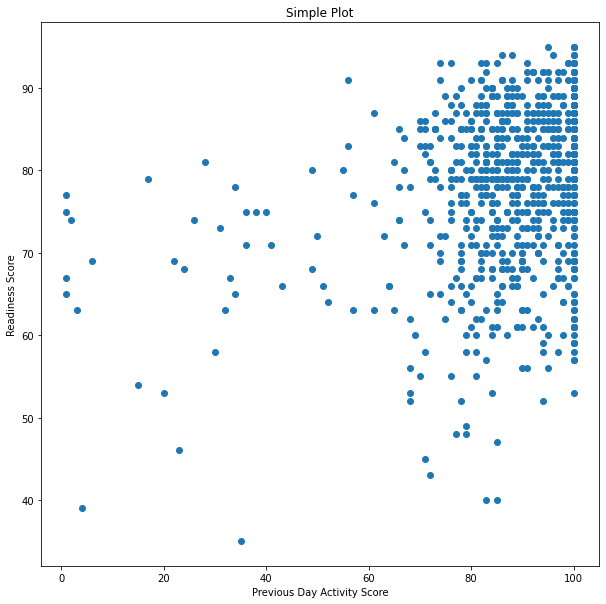

In [294]:
# 1. Prepare data
x = df["Previous Day Activity Score"]
y = df["Readiness Score"]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10))

# 3. Plot data
ax.scatter(x,y)

# 4. Customize plot
ax.set(title="Simple Plot", 
       xlabel="Previous Day Activity Score",
       ylabel="Readiness Score")

# 5. Save and show (you save the whole figure)
# fig.savefig("C:/Users/McLovin/OneDrive/Desktop/Capstone/New Data/Images/Figure_2.png")

## Remove data columns that are lagging data fields or not necessary

In [295]:
df.drop(df.columns[[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,53]], axis=1, inplace=True)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 7 to 895
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Total Sleep Duration      820 non-null    float64
 1   Activity Score            820 non-null    int64  
 2   Readiness Score           820 non-null    float64
 3   Temperature Score         820 non-null    float64
 4   Resting Heart Rate Score  820 non-null    float64
 5   HRV Balance Score         820 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 44.8 KB


In [297]:
df.describe()

,Total Sleep Duration,Activity Score,Readiness Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,6.934004,88.692683,77.615854,94.671951,71.592683,74.113415
std,1.324972,8.861611,10.039847,10.111633,31.736937,15.302503
min,2.800000,0.000000,35.000000,1.000000,1.000000,22.000000
25%,6.162500,84.000000,71.000000,93.000000,51.750000,64.000000
50%,6.966667,92.000000,79.000000,99.000000,86.000000,77.000000
75%,7.741667,95.000000,85.000000,100.000000,98.000000,87.000000
max,11.991667,100.000000,95.000000,100.000000,100.000000,100.000000


In [298]:
# Average Readiness Score
df["Readiness Score"].mean()

77.61585365853658

In [299]:
len(df)

820

## Algorithm/Estimator

In [300]:
# Import algorithm/estimator

# Instantiate and fit the model (on the training set)
# Try RandomForest estimator


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Setup random seed
np.random.seed(42)

# Create the data
df.dropna(inplace=True)
X = df.drop("Readiness Score", axis=1)
y = df["Readiness Score"] #target

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [301]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [302]:
model.fit(X_train, y_train);

In [303]:
y_preds = model.predict(X_test)

In [304]:
model.score(X_test, y_test)

0.06707317073170732

In [305]:
# Try Ridge Regression

from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.7083864563369104

In [306]:
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [307]:
from sklearn import linear_model
model = linear_model.LassoLars(alpha=1.0)
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.722420736903518

## Make Predictions Using Machine Language Model

In [308]:
test_data = pd.read_csv("C:/Users/McLovin/OneDrive/Desktop/Capstone/New Data/oura_2023-09-17_2023-09-17_trends.csv")

In [309]:
test_data.drop(test_data.columns[[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,53]], axis=1, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Total Sleep Duration      1 non-null      int64
 1   Activity Score            1 non-null      int64
 2   Readiness Score           1 non-null      int64
 3   Temperature Score         1 non-null      int64
 4   Resting Heart Rate Score  1 non-null      int64
 5   HRV Balance Score         1 non-null      int64
dtypes: int64(6)
memory usage: 180.0 bytes


In [310]:
## Remove Readiness Score
test_data.drop(test_data.columns[2], axis=1, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Total Sleep Duration      1 non-null      int64
 1   Activity Score            1 non-null      int64
 2   Temperature Score         1 non-null      int64
 3   Resting Heart Rate Score  1 non-null      int64
 4   HRV Balance Score         1 non-null      int64
dtypes: int64(5)
memory usage: 172.0 bytes


In [311]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Total Sleep Duration      1 non-null      int64
 1   Activity Score            1 non-null      int64
 2   Temperature Score         1 non-null      int64
 3   Resting Heart Rate Score  1 non-null      int64
 4   HRV Balance Score         1 non-null      int64
dtypes: int64(5)
memory usage: 172.0 bytes


In [312]:
## Convert Total Sleep Duration to hours
test_data["Total Sleep Duration"] = test_data["Total Sleep Duration"] / 3600

In [313]:
sleep_hours_pred = float(input("How many hours of planned sleep? "))
print(sleep_hours_pred)

How many hours of planned sleep?  8


8.0


In [314]:
test_data

,Total Sleep Duration,Activity Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score
0,6.633333,85,89,32,45


In [315]:
test_data["Total Sleep Duration"] = sleep_hours_pred
test_data

,Total Sleep Duration,Activity Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score
0,8.0,85,89,32,45


In [316]:
model.predict(test_data)

array([69.09050813])